In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [31]:
print('Number of Dublicate values in Data Frame = ',df.duplicated().sum())
#df.drop_duplicates(inplace=True)

Number of Dublicate values in Data Frame =  0


In [32]:
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
#remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
#df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [33]:
# Cleaning individual columns.


# Cost for 2 people is in object data type we need to convert it to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          49440 non-null  object 
 1   address                      49440 non-null  object 
 2   name                         49440 non-null  object 
 3   online_order                 49440 non-null  object 
 4   book_table                   49440 non-null  object 
 5   rate                         41665 non-null  object 
 6   votes                        49440 non-null  int64  
 7   phone                        48250 non-null  object 
 8   location                     49419 non-null  object 
 9   rest_type                    49215 non-null  object 
 10  dish_liked                   23492 non-null  object 
 11  cuisines                     49395 non-null  object 
 12  approx_cost(for two people)  49099 non-null  float64
 13  reviews_list    

In [34]:
df.name.value_counts()


Cafe Coffee Day               93
Onesta                        85
Just Bake                     72
Five Star Chicken             70
Empire Restaurant             69
                              ..
I-Scream'd                     1
Hotel New Grand                1
Panchamuki Fastfood            1
Sri Nanjundeshwara Canteen     1
Davanagere Benne Dosa          1
Name: name, Length: 8458, dtype: int64

c:\users\dhanshree\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


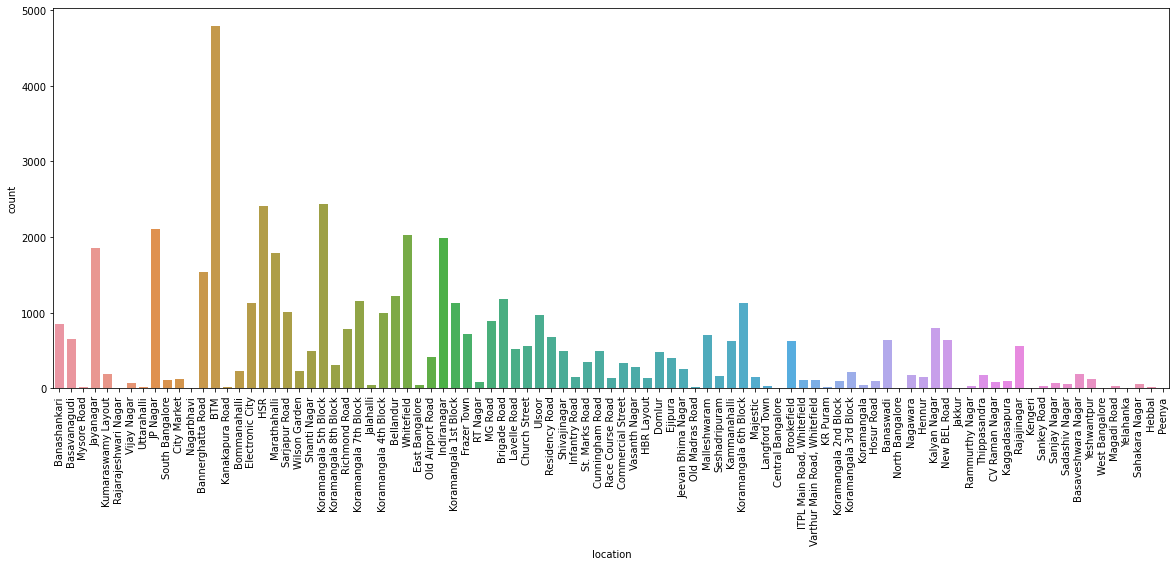

In [35]:
df.location.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('location', data=df);

c:\users\dhanshree\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


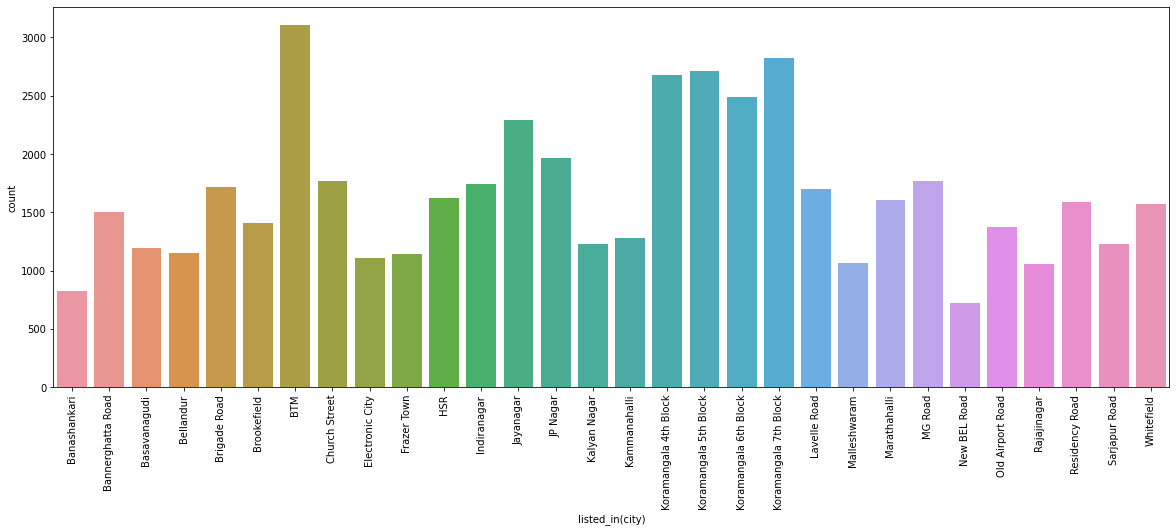

In [36]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('listed_in(city)', data=df);

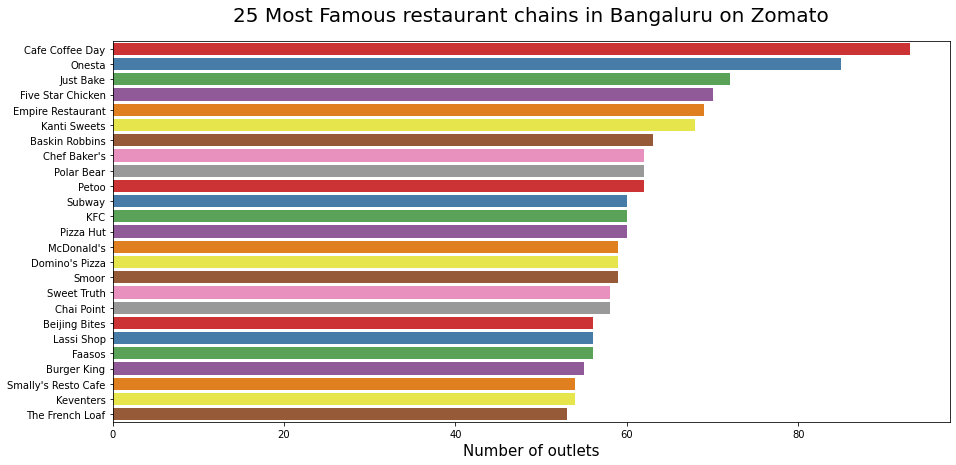

In [37]:
# Famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("25 Most Famous restaurant chains in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Number of outlets",size=15);

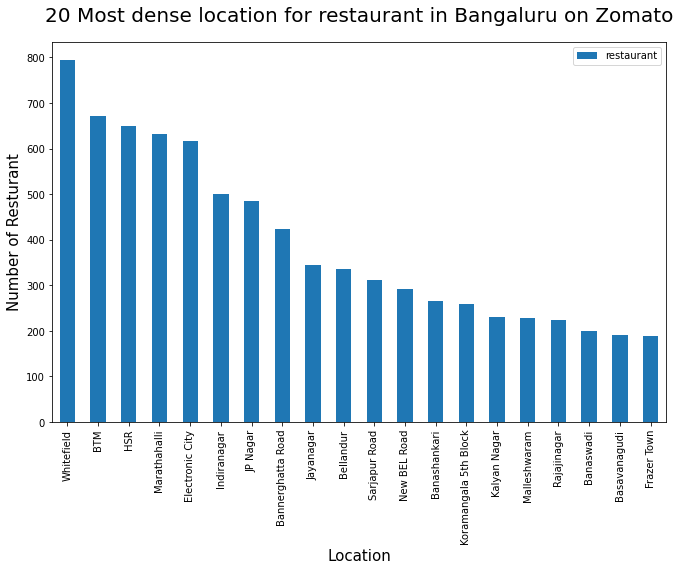

In [38]:
df.groupby('location')['name'].unique()

restaurant=[] 
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))
    
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)








df_total.sort_values(by='restaurant', ascending=False).head(20).plot.bar(figsize=(11,7));
# sns.barplot(x = df_total.sort_values(by='restaurant', ascending=False).tail(20) ,y = df_total.sort_values(by='restaurant', ascending=False).tail(20).index ,palette='Set1')
plt.title("20 Most dense location for restaurant in Bangaluru on Zomato",size=20,pad=20);
plt.xlabel("Location",size=15);
plt.ylabel("Number of Resturant",size=15);


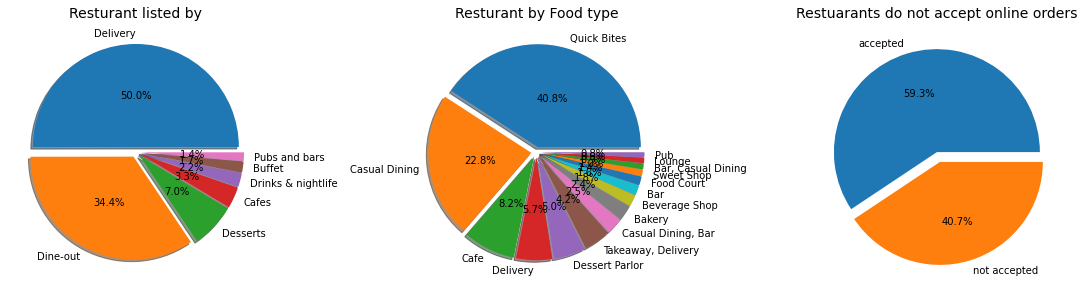

In [39]:
pie, ax = plt.subplots(figsize=[15,10])
plt.subplot(1,3,1)
labels = df['listed_in(type)'].value_counts().keys()
plt.pie(x=df['listed_in(type)'].value_counts(), autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant listed by", fontsize=14);
pie.savefig("Resturant listed by.png")

plt.subplot(1,3,2)
labels = df['rest_type'].value_counts()[:15].keys()
plt.pie(x=df['rest_type'].value_counts()[:15], autopct="%.1f%%", explode=[0.05]*15, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant by Food type", fontsize=14);
pie.savefig("Resturant by Food type.png")

plt.subplot(1,3,3)
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.title("Restuarants do not accept online orders", fontsize=14);
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%', labels=labels)

plt.tight_layout()


c:\users\dhanshree\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisines'>

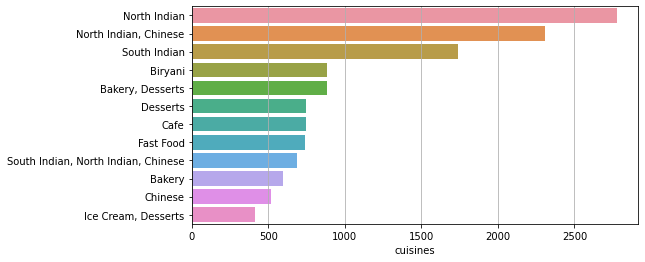

In [40]:
cu = df['cuisines'].value_counts()[:12] # top 12
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(cu,cu.index)

In [41]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

ModuleNotFoundError: No module named 'geopy'

# Geopy
lat_lon=[] # list that will store the lat and lon
geolocator=Nominatim(user_agent="app") # to establish connection 
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan) # if no location is there
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)
        
        

locations['geo_loc']=lat_lon
locations.to_csv('zomato_locations.csv',index=False)


ModuleNotFoundError: No module named 'wordcloud'

In [55]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from collections import Counter
from PIL import Image

# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from wordcloud import WordCloud

# Geolocation libs
from geopy.geocoders import Nominatim

# Utils modules
from custom_transformers import *
from viz_utils import *
from ml_utils import *

# ML libs
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import shap

ModuleNotFoundError: No module named 'folium'

In [56]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from collections import Counter
from PIL import Image

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'folium'

In [58]:
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'geopy'